In [1]:
import pandas as pd 
import xarray
import glob 
import pickle 

from pathlib import Path

run_dir = glob.glob("runs/development_run*")
run_dir = Path(sorted(run_dir)[-1]) # Latest

output_dir = Path(".")
fname = output_dir / "basins_prediction_results.p"
with open(fname, 'rb') as file: 
    x = pickle.load(file)

station = '23006'

# First key is ensemble member
sim = x['0'][station]['1D']['xr']
sim = sim.to_dataframe().dropna().reset_index()
dates = sim['date'].values 
dates = [dates[i] + pd.Timedelta(days=int(sim.time_step[i])) for i in range(sim.shape[0])]
sim = sim.rename({'date': 'end_date'}, axis=1)
sim['date'] = dates 

# Check alignment with obs - here 'Q_obs' should equal 'Q'
obs = pd.read_csv(f"nrfa/{station}.csv", parse_dates=[0])
sim = sim.merge(obs, how='left', on='date')
print(sim.head())
print(sim.tail())

IndexError: list index out of range

Let's plot the simulated discharge against observations for one forecast initialization time:

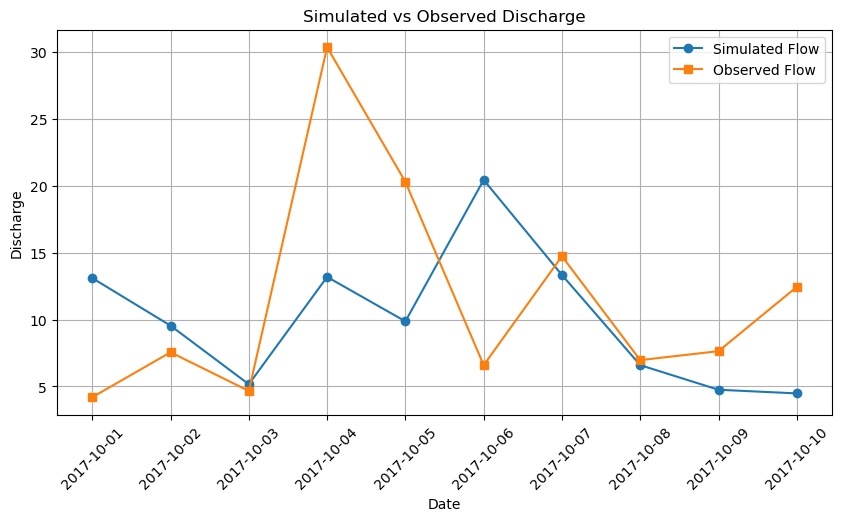

In [3]:
import matplotlib.pyplot as plt 

df = sim[sim['end_date'] == pd.to_datetime('2017-10-10')]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['Q_sim'], label='Simulated Flow', marker='o')
plt.plot(df['date'], df['Q_obs'], label='Observed Flow', marker='s')

# Formatting
plt.xlabel('Date')
plt.ylabel('Discharge')
plt.title(f'Simulated vs Observed Discharge')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()